# TWEET STANCE CLASSIFIER
### (Model Evaluator)

In [13]:
from utils.evaluator import StanceClassifierEvaluator
from models.custom_stance_classifier import CustomStanceClassifier
import numpy as np
import pandas as pd
import torch

## Load Test Data

In [2]:
test_df = pd.read_csv('data/processed_train.csv')

In [3]:
stance_map = {'FAVOR': 0, 'AGAINST': 1, 'NONE': 2}
test_df['Stance_Numeric'] = test_df['Stance'].map(stance_map)

In [4]:
y_test = test_df['Stance_Numeric']

In [5]:
test_inputs = test_df['Tweet'] + " [SEP] " + test_df['Target']

In [10]:
test_inputs = list(test_inputs)

## Evaluator

In [17]:
evaluator = StanceClassifierEvaluator(class_labels=['FAVOR', 'AGAINST', 'NONE'])

## Bertweet

In [7]:
bertweet_clf = CustomStanceClassifier.load_model('models/vinai/bertweet-base.pt')

d:\bin\tweet-stance-classification\models\custom_stance_classifier.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state = torch.load(path, map_location=device)


In [12]:
test_inputs = bertweet_clf.tokenizer(test_inputs,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

In [14]:
# Move tensors to device
input_ids = test_inputs['input_ids']
attention_mask = test_inputs['attention_mask']
        
# Get prediction
with torch.no_grad():
    outputs = bertweet_clf(input_ids, attention_mask)

In [16]:
y_preds = torch.argmax(outputs, dim=1).cpu().numpy()

=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.9254

Per-class F1 Scores:
FAVOR: 0.8986
AGAINST: 0.9362
NONE: 0.9320

Detailed Classification Report:

FAVOR:
  Precision: 0.8803
  Recall: 0.9177
  F1-score: 0.8986
  Support: 753.0

AGAINST:
  Precision: 0.9465
  Recall: 0.9262
  F1-score: 0.9362
  Support: 1395.0

NONE:
  Precision: 0.9332
  Recall: 0.9308
  F1-score: 0.9320
  Support: 766.0

macro avg:
  Precision: 0.9200
  Recall: 0.9249
  F1-score: 0.9223
  Support: 2914.0

weighted avg:
  Precision: 0.9259
  Recall: 0.9252
  F1-score: 0.9254
  Support: 2914.0


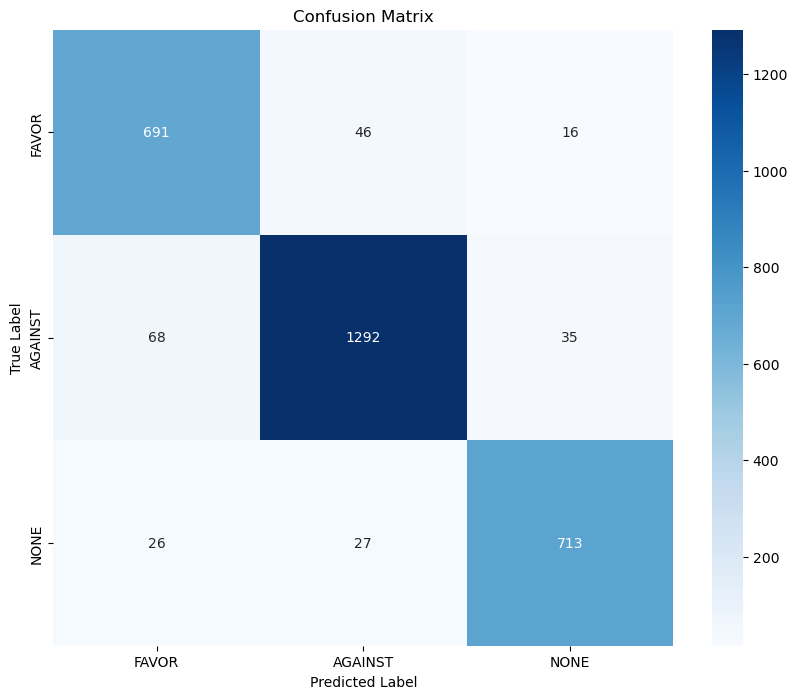

In [18]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])